In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")


Setup Complete


In [154]:
#init
country = 'Poland'
age_data_path = 'Data/age_data.xls'
both_sheet = 'both; 1950-2005, estimates'
female_sheet = 'f; 1950-2005, estimates'
male_sheet = 'm; 1950-2005, estimates'

unnesessary_rows = range(0,5)
# right names for columns in data sheet
columns_names = {'Reference date (as of 1 July)':'year','Total population by five-year age groups (thousands)': '0 - 4', 'Unnamed: 7': '5 - 9', 'Unnamed: 8': '10 - 14', 'Unnamed: 9': '15 - 19', 'Unnamed: 10': '20 - 24', 'Unnamed: 11': '25 - 29', 'Unnamed: 12': '30 - 34', 'Unnamed: 13': '35 - 39', 'Unnamed: 14': '40 - 44', 'Unnamed: 15': '45 - 49', 'Unnamed: 16': '50 - 54', 'Unnamed: 17': '55 - 59', 'Unnamed: 18': '60 - 64', 'Unnamed: 19': '65 - 69', 'Unnamed: 20': '70 - 74', 'Unnamed: 21': '75 - 79', 'Unnamed: 22': '80 - 84', 'Unnamed: 23': '85 - 89', 'Unnamed: 24': '90 - 94', 'Unnamed: 25': '95 - 99', 'Unnamed: 26': '100+', 'Female population by five-year age groups (thousands)': '0 - 4', 'Male population by five-year age groups (thousands)': '0 - 4'}
# names of unnesessary columns
skipped_columns = {'index', 'Index', 'Variant','Major area, region, country or area*', 'Notes', 'Country code'}



In [155]:
def extract_data(sheet):
    data = pd.read_excel(age_data_path, sheet_name=sheet, skiprows = unnesessary_rows)
    data = data[data['Major area, region, country or area*'] == country]
    data = data.rename(columns=columns_names)
    data = data.reset_index().drop(columns = skipped_columns, axis = 1)
    data.replace('-', np.nan, inplace = True)
    data = data.astype(np.float64)
    data = data.astype({'year': np.int64})
    data = data.set_index('year')
    return data

Get needed estimate data for males and females:

In [156]:
#get needed data
data_both = extract_data(both_sheet)
data_female = extract_data(female_sheet)
data_male = extract_data(male_sheet)
data_both

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
year,,,,,,,,,,,,,,,,,,,,,
1950,2950.000,2022.000,2323.000,2412.000,2369.000,2108.000,1355.000,1766.000,1793.000,1554.000,...,900.000,747.000,531.000,354.000,230.000,183.005,NaN,NaN,NaN,NaN
1955,3525.000,2923.000,2000.000,2297.000,2393.000,2322.000,2079.000,1334.000,1724.000,1740.000,...,1149.000,807.000,645.000,426.000,245.000,188.001,NaN,NaN,NaN,NaN
1960,3511.068,3499.037,2907.510,1954.047,2225.749,2337.037,2312.974,2023.226,1313.392,1686.356,...,1411.646,1064.750,713.844,491.269,288.746,216.555,NaN,NaN,NaN,NaN
1965,2830.405,3448.401,3482.346,2887.313,1934.859,2212.408,2324.227,2303.261,2001.750,1306.879,...,1626.359,1313.867,940.473,584.052,366.405,250.593,NaN,NaN,NaN,NaN
1970,2548.796,2803.977,3455.336,3465.579,2845.150,1918.124,2181.942,2290.000,2243.001,1948.453,...,1545.246,1485.191,1141.703,768.918,479.366,301.715,NaN,NaN,NaN,NaN
1975,2865.864,2533.644,2774.467,3421.772,3422.907,2798.836,1888.579,2142.799,2241.398,2184.146,...,1179.644,1437.927,1313.847,957.516,571.439,401.201,NaN,NaN,NaN,NaN
1980,3241.645,2864.700,2522.132,2772.794,3339.688,3350.106,2768.472,1855.345,2102.093,2172.959,...,1783.328,1096.543,1212.222,1113.831,732.324,541.351,NaN,NaN,NaN,NaN
1985,3422.803,3223.816,2852.207,2509.060,2750.257,3305.001,3310.216,2731.213,1819.730,2046.591,...,1990.895,1647.193,975.952,1074.220,810.209,641.892,NaN,NaN,NaN,NaN
1990,2953.222,3389.227,3230.868,2848.110,2467.424,2677.653,3267.467,3244.422,2671.247,1766.023,...,1972.127,1830.587,1461.560,811.713,793.273,765.341,NaN,NaN,NaN,NaN


Demographic profile: 

Text(0.5, 1.0, 'Demographic profile for 2000 year')

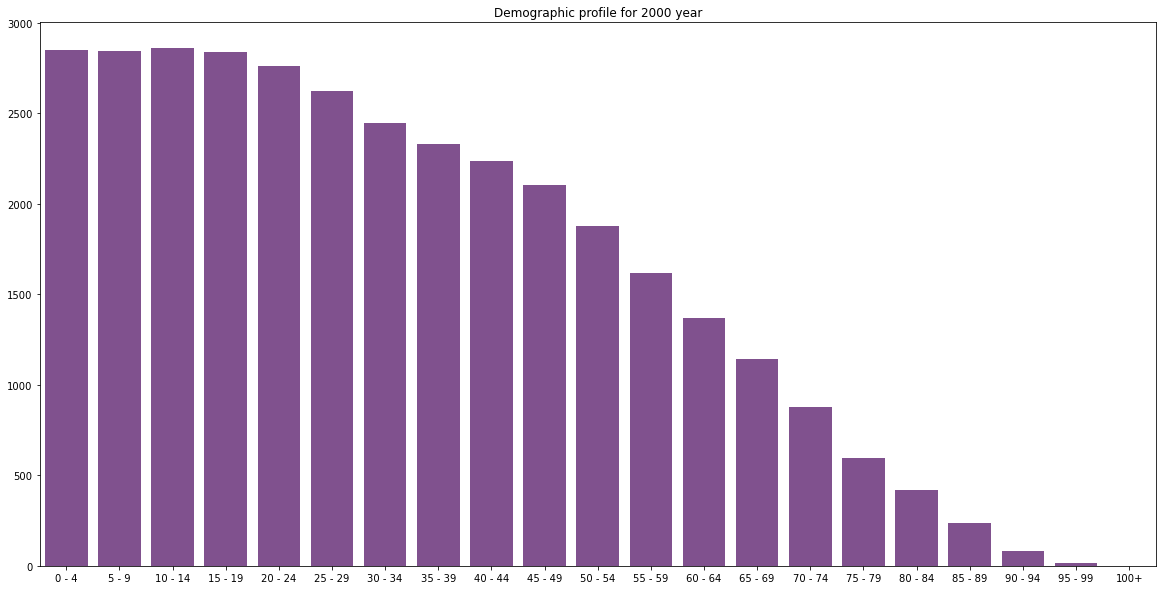

In [158]:
year = 2000

plt.figure(figsize=(20,10))
sns.barplot(data=data_both, ci=None, color='#854798')
plt.title(f'Demographic profile for {year} year')

1. Determine "survival" rate: